In [1]:
import pandas as pd
import numpy as np
# from dh2loop import dh2l
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

In [ ]:
# Hi John and Eduardo, thank you so much for your prompt answer and for your help! 

In [ ]:
# Source code: https://github.com/GeoML-SIG/geoml_workshops
# and https://towardsdatascience.com/displaying-lithology-data-using-python-and-matplotlib-58b4d251ee7a

In [103]:
# import lab data for selected holes
training_data = pd.read_csv('lithologies_and_everything.csv')

In [104]:
training_data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Sample,1,2,3,4,5
East,12653.60489,12654.25374,12654.90258,12655.53561,12656.18445
North,5949.422692,5949.308283,5949.193873,5949.082255,5948.967845
Elevation,1872.164223,1871.379028,1870.593832,1869.827788,1869.042592
...,...,...,...,...,...
Zr_ppm,0.8,0.8,1.0,1.2,1.5
SiO2,53.27,50.92,48.64,51.53,56.15
TiO2,0.964392,0.887641,0.879299,0.779189,0.765841
cluster,2,2,2,2,2


In [106]:
# calculate Mg/Fe ratio
training_data['Mg_Fe'] = training_data['Mg_pct'] / training_data['Fe_pct']

In [107]:
# plot
# check the number of legend entries, decide on legend colors
training_data['Rock'].unique()

array(['mafic2', 'andesite/dacite1', 'mafic1', 'diorite1', 'dacite1/2',
       'diorite2', 'dacite3', 'dacite1', 'dacite2', 'andesite/dacite3'],
      dtype=object)

In [112]:
training_data['Clusters'] = training_data['cluster'] + 1

In [176]:
def makeplot(well_df, top_depth, bottom_depth):
    fig, ax = plt.subplots(figsize=(12,9))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1, sharey = ax1)
    
 

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    ax10 = ax1.twiny()
    ax10.xaxis.set_visible(False)
    ax11 = ax2.twiny()
    ax11.xaxis.set_visible(False)

    # Mg/Fe track
    ax1.plot(well_df["Mg_Fe"], well_df.index, color = "black", linewidth = 0.5)
    ax1.set_xlabel("Mg/Fe")
    ax1.xaxis.label.set_color("black")
    ax1.set_xlim(0, max(well_df["Mg_Fe"]))
    ax1.set_ylabel("Depth (m)")
    ax1.tick_params(axis='x', colors="black")

    ax1.title.set_color('black')

    
    left_col_value = 0
    right_col_value = max(well_df["Mg_Fe"])
    span = abs(left_col_value - right_col_value)


    # Sr
    ax2.plot(well_df['Sr_ppm'], well_df.index, '-', color='green')
    ax2.set_xlabel("Sr, ppm")
    ax2.set_xlim(min(well_df['Sr_ppm']), max(well_df['Sr_ppm']))
    ax2.xaxis.label.set_color("green")
    ax2.tick_params(axis='x', colors="green")
    ax2.spines["top"].set_edgecolor("green")





    # Cluster Track
    if any("Clusters" in s for s in well_df.columns.tolist()):
        log = [l for l in well_df.columns.tolist() if "Cluster" in l][0]
        str(log)
        ax4 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1, sharey = ax1)
        
        ax4.plot(well_df.index, well_df[log],color = "black", linewidth = 0.5)
        ax4.set_xlabel("Cluster")
        ax4.xaxis.label.set_color("black")
        ax4.set_xlim(0, 1)
        ax4.tick_params(axis='x', colors="black")
        ax4.spines["top"].set_edgecolor("black")
        ax4.title.set_color('black')

        
        #loop through each value in the color_index
        for k,v in cluster_color_dict.items():
            color = v #obtain colour for color index value
            
            ax4.fill_betweenx(well_df.index, 100, where = well_df[log] == k,  color = color)

              
        ax4.set_xticks([0, 1])
        ax4.set_ylim(bottom_depth, top_depth)
        ax4.grid(which='major', color='lightgrey', linestyle='-')

        plt.setp(ax4.get_yticklabels(), visible = False)


    # Misc Formatting
    for ax in [ax1, ax2]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        
        
    for ax in [ax2]:
        plt.setp(ax.get_yticklabels(), visible = False)
        
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.25)
    fig.suptitle('DH: %s'%well_df.iloc[0]['holeid'], fontsize=14, y=1.05)
    plt.savefig('DH' + well_df.iloc[0]['holeid'] + '_test.jpg', dpi=300)

In [177]:
# get the list of clusters and make a dictionary with colors
training_data.index


RangeIndex(start=0, stop=3830, step=1)

In [178]:
training_data['Clusters'].unique()

array([ 3,  4,  6,  5,  2,  7,  9,  1,  8, 10], dtype=int64)

In [179]:
# Legend for clusters: dictionary with a key
{
    1:'#8dd3c7',
    2:'#ffffb3',
    3:'#bebada',
    4:'#fb8072',
    5:'#80b1d3',
    6:'#fdb462',
    7:'#b3de69',
    8:'#fccde5',
    9:'#d9d9d9',
    10: '#bc80bd'
     }

cluster_numbers = {'101': {'cluster_num':1, 'color':'#8dd3c7'},
                   '102': {'cluster_num':2, 'color':'#ffffb3'},
                   '103': {'cluster_num':3, 'color':'#bebada'},
                   '104': {'cluster_num':4, 'color':'#fb8072'},
                   '105': {'cluster_num':5, 'color':'#80b1d3'},
                   '106': {'cluster_num':6, 'color':'#fdb462'},
                   '107': {'cluster_num':7, 'color':'#b3de69'},
                   '108': {'cluster_num':8, 'color':'#fccde5'},
                   '109': {'cluster_num':9, 'color':'#d9d9d9'},
                   '110': {'cluster_num':10, 'color':'#bc80bd'}
                   
                  }

df_cluster = pd.DataFrame.from_dict(cluster_numbers, orient='index')
df_cluster.index.name = 'CLUSTER_KEY'
df_cluster

,cluster_num,color
CLUSTER_KEY,,
101,1,#8dd3c7
102,2,#ffffb3
103,3,#bebada
104,4,#fb8072
105,5,#80b1d3
106,6,#fdb462
107,7,#b3de69
108,8,#fccde5
109,9,#d9d9d9


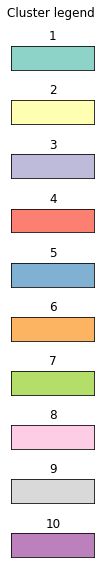

In [180]:
# make the legend
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=1,nrows=10, sharex=True, sharey=True,
                         figsize=(1.5,8), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, cluster_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=cluster_numbers[key]['color'])# , hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(cluster_numbers[key]['cluster_num']))
fig.suptitle('Cluster legend')
plt.tight_layout()
plt.savefig('legend_clusters.jpg', dpi = 300)
plt.show()

In [181]:
training_data['holeid'].unique()

array(['DDH001', 'DDH002', 'DDH003', 'DDH004', 'DDH005', 'DDH006',
       'DDH007', 'DDH008', 'DDH009', 'DDH010', 'DDH011', 'DDH012',
       'DDH013', 'DDH014'], dtype=object)

In [182]:
# select one drill hole
df_tc_cluster = training_data[training_data['holeid'] == 'DDH001']

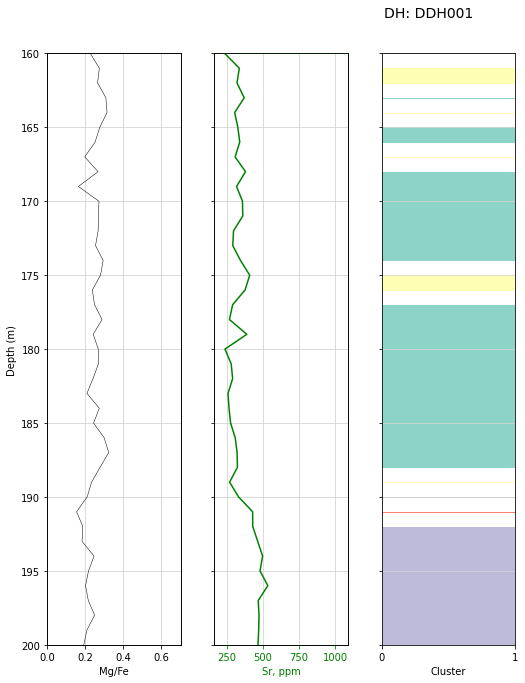

In [183]:
# when comparing the downhole plot to the clusters in the csv file, I see that the problem is probably in the intervals I have 
# (not integers but smaller ones with depth_from and depth_to like 152.58?)
# maybe I should loop through the rows and try to draw rectangles and fill them with a color from the dictionary?
# for this drillhole, the interval from 160.94 m to 173.93 m should be cluster 4(labeled 5 to avoid label "0"), 
# but when I compare the legend to the plot, I see that the clusters are 1 and 2, with some empty space in between


makeplot(df_tc_cluster,160,200)
